## MFDFA of PSP Sub and Super Alfvenic Intervals

In [1]:
# First we need to import the necessary libraries. 
# Pyspedas handles loading the data, while MFDFA handles fluctuation function calculation
import pyspedas
import matplotlib.pyplot as plt
import numpy as np
from pytplot import tplot
import sys
sys.path.append('../../Solar_Wind_MFDFA/src')
import MFDFAlib
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import pacf

### Loading the Sub-Alfvenic and Super-Alfvenic Regions: 

18-Jun-25 23:53:14: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn/2021/
18-Jun-25 23:53:14: File is current: psp_data/fields/l2/mag_rtn/2021/psp_fld_l2_mag_rtn_2021043000_v02.cdf
18-Jun-25 23:53:18: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn/2021/
18-Jun-25 23:53:19: File is current: psp_data/fields/l2/mag_rtn/2021/psp_fld_l2_mag_rtn_2021043000_v02.cdf
18-Jun-25 23:53:19: /home/scoscia/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(



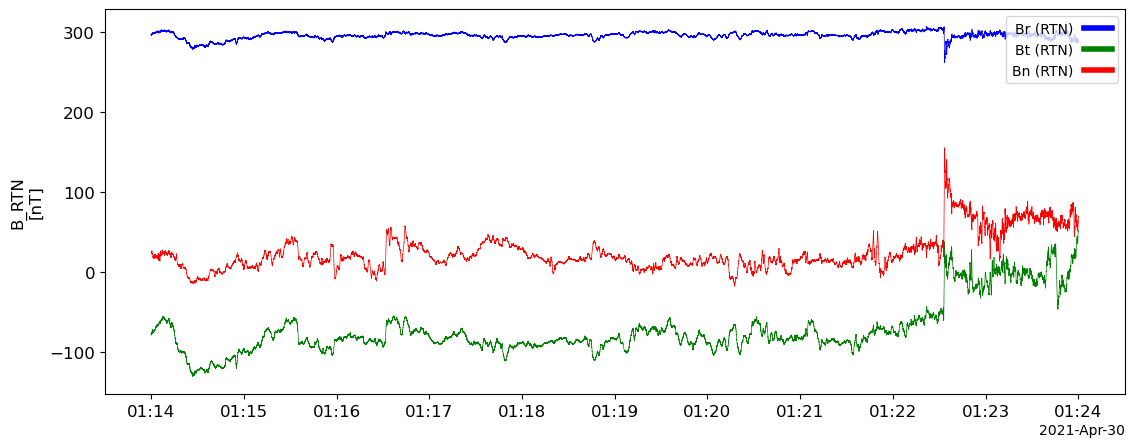

18-Jun-25 23:53:20: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn/2021/
18-Jun-25 23:53:20: File is current: psp_data/fields/l2/mag_rtn/2021/psp_fld_l2_mag_rtn_2021043000_v02.cdf
18-Jun-25 23:53:23: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn/2021/
18-Jun-25 23:53:24: File is current: psp_data/fields/l2/mag_rtn/2021/psp_fld_l2_mag_rtn_2021043000_v02.cdf


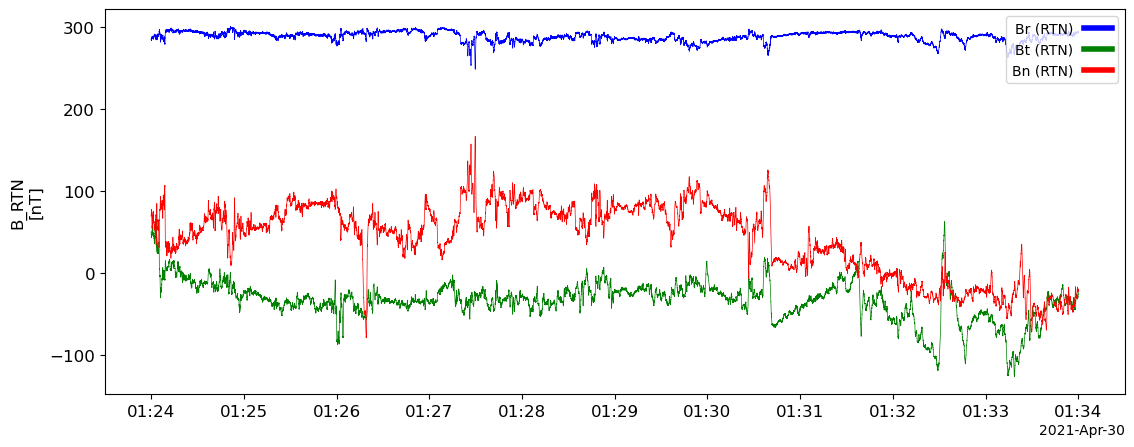

In [2]:
# First let's load the sub-Alfvenic time range
# Ranges taken from https://arxiv.org/pdf/2201.10718 Section 3
subAlfTimeRange = ['2021-4-30/01:14','2021-4-30/01:24']

# Here we set the environment variable for the specified time range of the PSP data:
fields_vars = pyspedas.projects.psp.fields(trange=subAlfTimeRange, datatype='mag_rtn', level='l2', time_clip=True)

# Here we extract the RTN coordinate B-field data for PSP:
b_rtn_subAlf = pyspedas.get_data("psp_fld_l2_mag_RTN")

# Here we calculate the magnitude of the B-field data: 
bmag_sub = MFDFAlib.magnitude(b_rtn_subAlf.y)

# Here we plot the data to make sure everything looks proper
tplot('psp_fld_l2_mag_RTN')

# Finally, we perform the multifractal analysis using the MFDFA library:
# This will give us the Renyi spectrum, Hurst spectrum, fluctuation function, and singularity spectrum
# MFDFA = MFDFAlib.MFDFA_analysis(bmag_sub)

# Now let's choose the corresponding super-Alfvenic time range
superAlfTimeRange = ['2021-4-30/01:24','2021-4-30/01:34']

# Here we set the environment variable for the specified time range of the PSP data:
fields_vars = pyspedas.projects.psp.fields(trange=superAlfTimeRange, datatype='mag_rtn', level='l2', time_clip=True)

# Here we extract the RTN coordinate B-field data for PSP:
b_rtn_superAlf = pyspedas.get_data("psp_fld_l2_mag_RTN")

# Here we calculate the magnitude of the B-field data: 
bmag_super = MFDFAlib.magnitude(b_rtn_superAlf.y)

# Here we plot the data to make sure everything looks proper:
tplot('psp_fld_l2_mag_RTN')

sub_label = 'Sub-Alfvenic Interval (April 30th, 2021 from 01:14-01:24 UTC)'
super_label = 'Super-Alfvenic Interval (April 30th, 2021 from 01:24-01:34 UTC)'

# Finally, we perform the multifractal analysis using the MFDFA library:
# This will give us the Renyi spectrum, Hurst spectrum, fluctuation function, and singularity spectrum
# MFDFAb = MFDFAlib.MFDFA_analysis(bmag_sub, bmag_super, sub_label, super_label)

175781


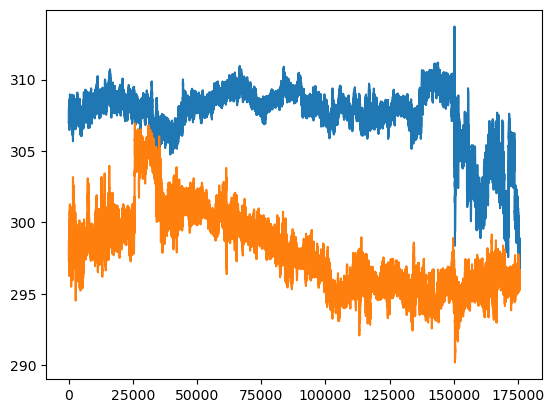

In [3]:
# Plot the magnitude data
plt.plot(bmag_sub)
plt.plot(bmag_super)
print(len(bmag_sub))

#### Initiating Lags and q Powers 

In [4]:
# We first need to select a band of lags, varying from small segments of data to long ones:
# These bands must be integers, since they will segment the data into chunks of side length s:
lag1 = np.arange(10,len(bmag_sub),1)
lag2 = np.arange(10,len(bmag_super),1)
#lag1 = np.unique(np.logspace(np.log10(1),np.log10(len(bmag_sub)),100000, dtype = int))
#lag2 = np.unique(np.logspace(np.log10(1),np.log10(len(bmag_super)),100000, dtype = int))
#print(lag1)
# We need to select a range of powers for the fluctuation function.
# Gomes et al. do -20 to 20 with increments of 0.25
qList=np.arange(-20,20,0.25).tolist()
qList.remove(0)

#The order for the polynomial fitting is chosen by Gomes et al. as 3:
order = 3

date_label_sub = f'sub_4_30_2021_1_{order}'
date_label_super = f'super_4_30_2021_1_{order}'
date_label_general = f'4_30_2021_1_{order}'



#### Autocorrelation Function :

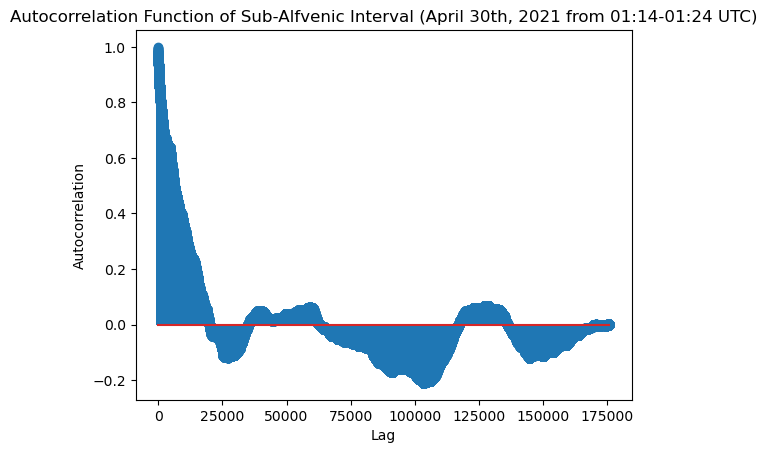

In [5]:
# Calculate the autocorrelation function using statsmodels library
acf = sm.tsa.acf(bmag_sub, nlags = len(bmag_sub))
plt.stem(range(len(acf)), acf)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title(f"Autocorrelation Function of {sub_label}")
plt.show()


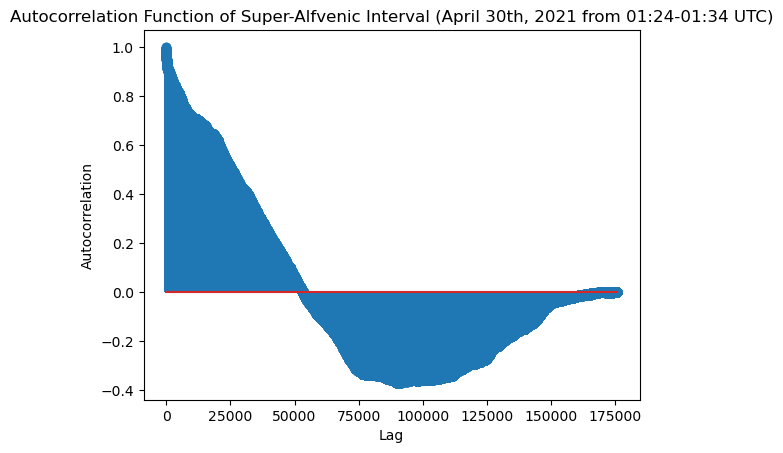

In [6]:
# Calculate the autocorrelation function using statsmodels library
acf = sm.tsa.acf(bmag_super, nlags = len(bmag_super))
plt.stem(range(len(acf)), acf)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title(f"Autocorrelation Function of {super_label}")
plt.show()

#### Fluctuation Function

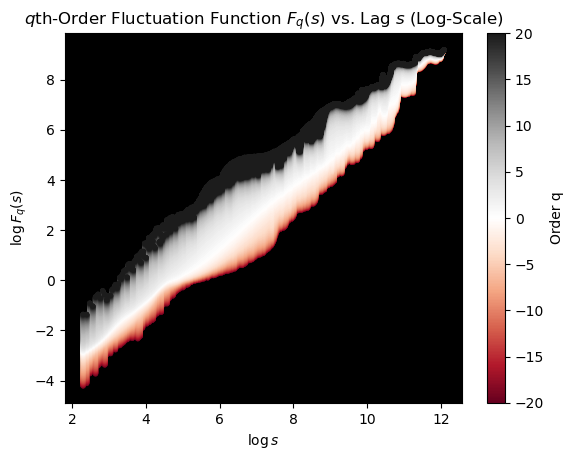

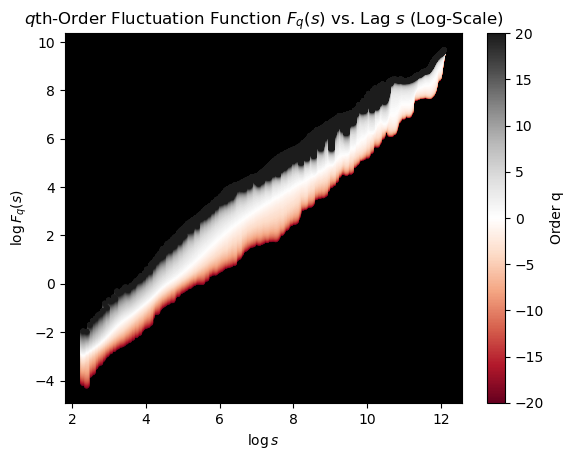

In [7]:
# Find the fluctuation function:
lag1,dfaList1 = MFDFAlib.flucFunc(bmag_sub,lag1,qList,order, date_label_sub)
lag2,dfaList2 = MFDFAlib.flucFunc(bmag_super,lag2,qList,order, date_label_super)


#### Hurst Parameter Spectrum

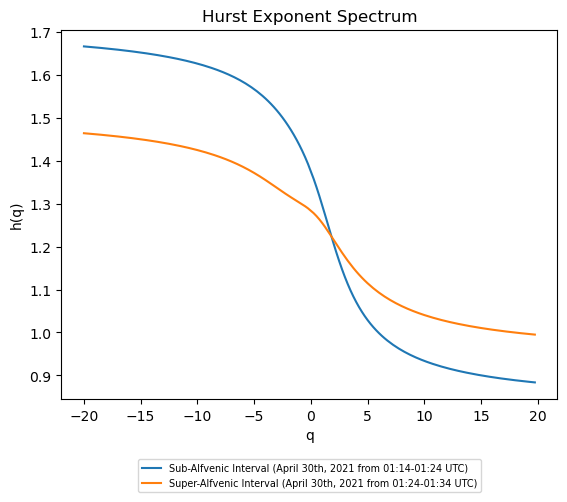

In [8]:
"""
 Hurst parameter spectra from each fluctuation function:
 Note : hList takes in the transpose of the fluctuation matrix,
 which is of the form: [[F_q1(s1),F_q1(s2), ...], [F_q2(s1),F_q2(s2), ...]]
 for the purpose of easily parsing the data  
"""
h1=MFDFAlib.hList(lag1,dfaList1.T)
h2=MFDFAlib.hList(lag2,dfaList2.T)
########PLOTTING#################
plt.plot(qList,h1,label=sub_label)
plt.plot(qList,h2,label=super_label)
plt.ylabel('h(q)')
plt.xlabel('q')
plt.legend(fontsize = 'x-small', loc='upper center', bbox_to_anchor=(0.5, -0.15))
plt.title('Hurst Exponent Spectrum')
plt.savefig(f'./plots/Order_{order}/Hurst_Spectra/hurstSpec_{date_label_general}.png')
plt.show()
#################################

#### Renyi Exponent Spectrum

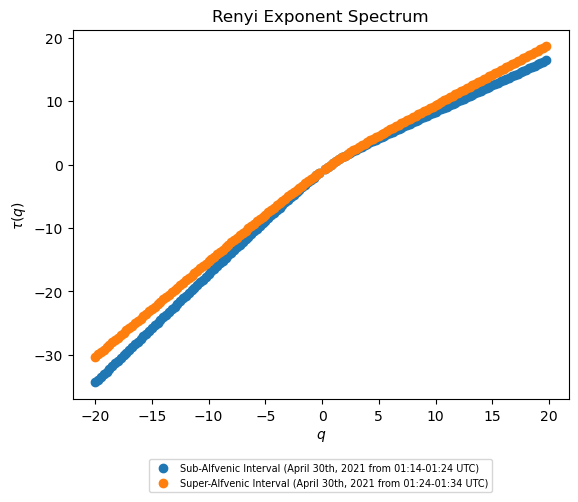

In [9]:
# Now find and plot the Renyi exponent spectrum from the Hurst spectrum:
tauFunc1=MFDFAlib.renyiExp(qList,h1)
tauFunc2=MFDFAlib.renyiExp(qList,h2)
########PLOTTING#################
plt.plot(qList,tauFunc1,'o',label = sub_label)
plt.plot(qList,tauFunc2,'o', label = super_label)
plt.xlabel(r'$q$')
plt.ylabel(r'$\tau(q)$')
plt.legend(fontsize = 'x-small', loc='upper center', bbox_to_anchor=(0.5, -0.15))
plt.title('Renyi Exponent Spectrum')
plt.savefig(f'./plots/Order_{order}/Renyi_Spectra/renyiSpec_{date_label_general}')
plt.show()
#################################

#### Multifractal Spectrum

0.8799503301647889 0.5627013680036868 0.5259003348948459 0.6154809502841684


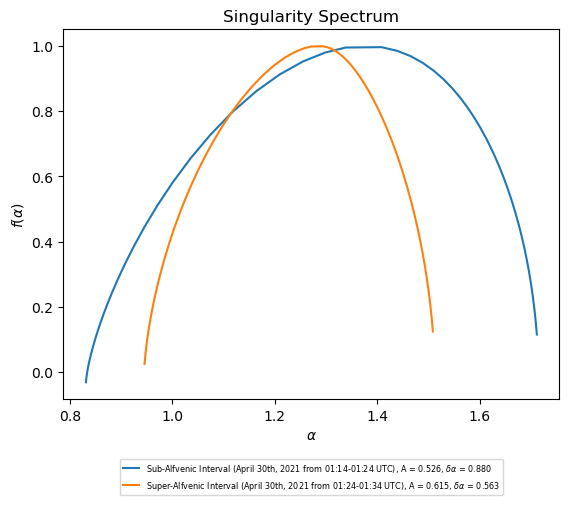

In [10]:
# Finally, from the Renyi exponents, find and plot the multifractal spectra:
alphaList1, mfList1, deltaAlpha1, A1 = MFDFAlib.mfSpec(tauFunc1, qList)
alphaList2, mfList2, deltaAlpha2, A2 = MFDFAlib.mfSpec(tauFunc2, qList)

print(deltaAlpha1, deltaAlpha2, A1, A2)
#######PLOTTING##################
# Finally, plot the f(alpha) function
plt.plot(alphaList1, mfList1, label = sub_label + rf", A = ${A1:.3f}$, $\delta\alpha$ = {deltaAlpha1:.3f}")
plt.plot(alphaList2, mfList2, label = super_label + rf", A = ${A2:.3f}$, $\delta\alpha$ = {deltaAlpha2:.3f}")
plt.title('Singularity Spectrum')
plt.legend(fontsize = "xx-small", loc='upper center', bbox_to_anchor=(0.5, -0.15))
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$f(\alpha)$')
plt.savefig(f'./plots/Order_{order}/MF_Spectra/MFSpec_{date_label_general}.png', bbox_inches ='tight')
plt.show()
#################################

#### Power Spectral Density

Text(0, 0.5, 'Power Spectral Density [nt**2/Hz]')

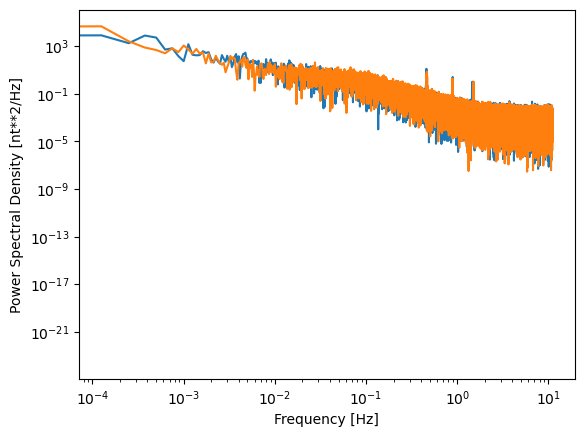

In [11]:
# Here we are calculating the PSD function of each data set:
# Choose 22 Hz as the sampling frequency, as in Gomes et al.
fs = 22 # Hz
fList1, PSDlist1 = MFDFAlib.PSDfunc(bmag_sub,fs)
fList2, PSDlist2 = MFDFAlib.PSDfunc(bmag_super,fs)
#######PLOTTING###################
plt.loglog(fList1,PSDlist1, label = sub_label)
plt.loglog(fList2,PSDlist2, label = super_label)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power Spectral Density [nt**2/Hz]')
##################################

### Shuffled Data

In [12]:
# First we use MFDFAlib to shuffle our time series intervals:
shuffled_sub = MFDFAlib.shuffle(bmag_sub)
shuffled_super = MFDFAlib.shuffle(bmag_super)


date_label_sub = f'shuf_sub_4_30_2021_1_{order}'
date_label_super = f'shuf_super_4_30_2021_1_{order}'
date_label_general = f'shuf_4_30_2021_1_{order}'


#### Fluctuation Function (Shuffled)

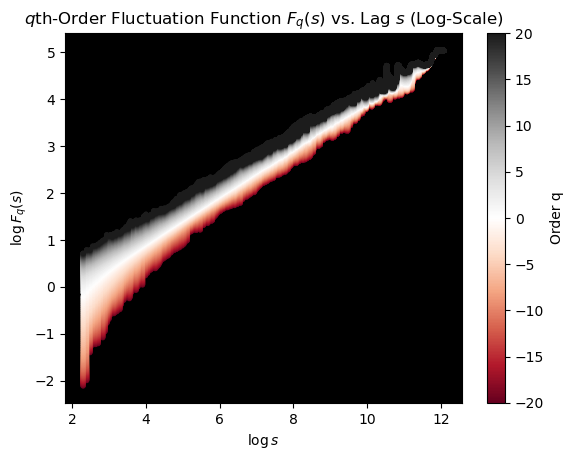

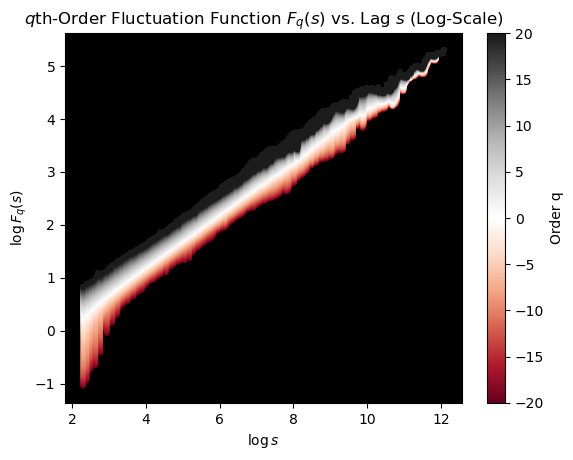

In [13]:
# Find the fluctuation function:
lag1,dfaList_shuf1 = MFDFAlib.flucFunc(shuffled_sub,lag1,qList,order, date_label_sub)
lag2,dfaList_shuf2 = MFDFAlib.flucFunc(shuffled_super,lag2,qList,order, date_label_super)

#### Hurst Spectrum (Shuffled)

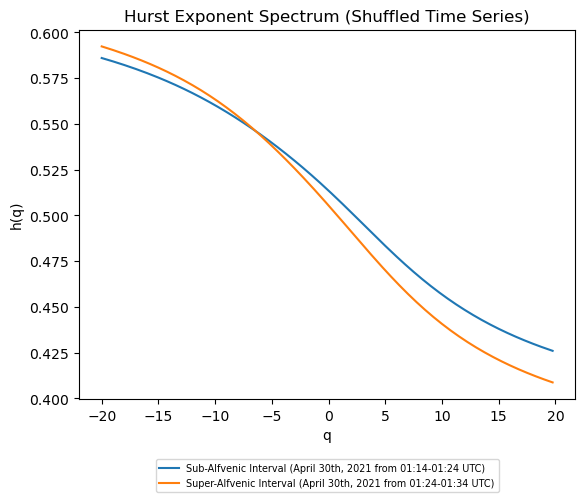

In [14]:
"""
 Hurst parameter spectra from each fluctuation function:
 Note : hList takes in the transpose of the fluctuation matrix,
 which is of the form: [[F_q1(s1),F_q1(s2), ...], [F_q2(s1),F_q2(s2), ...]]
 for the purpose of easily parsing the data  
"""
h_shuf1=MFDFAlib.hList(lag1,dfaList_shuf1.T)
h_shuf2=MFDFAlib.hList(lag2,dfaList_shuf2.T)
########PLOTTING#################
plt.plot(qList,h_shuf1,label=sub_label)
plt.plot(qList,h_shuf2,label=super_label)
plt.ylabel('h(q)')
plt.xlabel('q')
plt.legend(fontsize = 'x-small', loc='upper center', bbox_to_anchor=(0.5, -0.15))
plt.title('Hurst Exponent Spectrum (Shuffled Time Series)')
plt.savefig(f'./plots/Order_{order}/Hurst_Spectra/hurstSpec_{date_label_general}.png')
plt.show()
#################################

#### Renyi Exponent Spectrum (Shuffled)

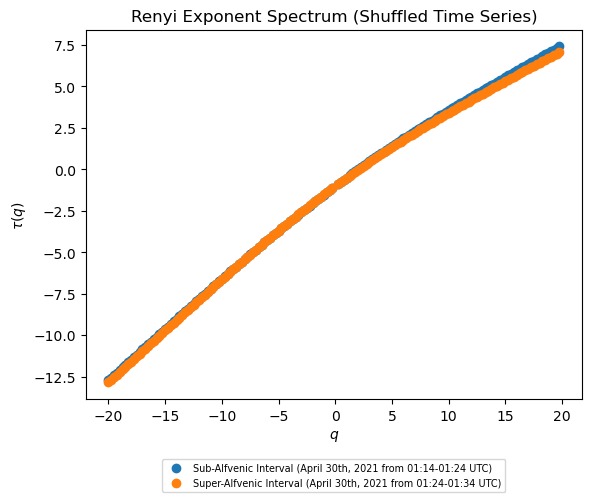

In [15]:
# Now find and plot the Renyi exponent spectrum from the Hurst spectrum:
tauFunc_shuf1=MFDFAlib.renyiExp(qList,h_shuf1)
tauFunc_shuf2=MFDFAlib.renyiExp(qList,h_shuf2)
########PLOTTING#################
plt.plot(qList,tauFunc_shuf1,'o',label = sub_label)
plt.plot(qList,tauFunc_shuf2,'o', label = super_label)
plt.xlabel(r'$q$')
plt.ylabel(r'$\tau(q)$')
plt.legend(fontsize = 'x-small', loc='upper center', bbox_to_anchor=(0.5, -0.15))
plt.title('Renyi Exponent Spectrum (Shuffled Time Series)')
plt.savefig(f'./plots/Order_{order}/Renyi_Spectra/renyiSpec_{date_label_general}')
plt.show()
#################################

#### Multifractal Spectrum (Shuffled)

0.23679517083634494 0.26337257529128166 0.8007472929761748 0.8555692622583606


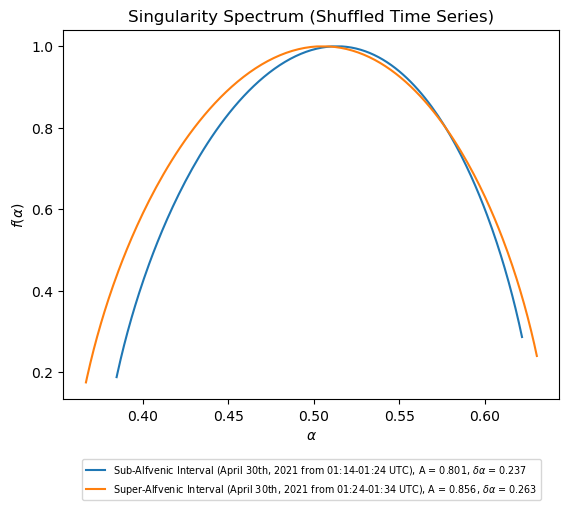

In [16]:
# Finally, from the Renyi exponents, find and plot the multifractal spectra:
alphaList_shuf1, mfList_shuf1, deltaAlpha1, A1 = MFDFAlib.mfSpec(tauFunc_shuf1, qList)
alphaList_shuf2, mfList_shuf2, deltaAlpha2, A2 = MFDFAlib.mfSpec(tauFunc_shuf2, qList)

print(deltaAlpha1, deltaAlpha2, A1, A2)
#######PLOTTING##################
# Finally, plot the f(alpha) function
plt.plot(alphaList_shuf1, mfList_shuf1, label = sub_label + rf", A = ${A1:.3f}$, $\delta\alpha$ = {deltaAlpha1:.3f}")
plt.plot(alphaList_shuf2, mfList_shuf2, label = super_label + rf", A = ${A2:.3f}$, $\delta\alpha$ = {deltaAlpha2:.3f}")
plt.title('Singularity Spectrum (Shuffled Time Series)')
plt.legend(fontsize = "x-small", loc='upper center', bbox_to_anchor=(0.5, -0.15))
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$f(\alpha)$')
plt.savefig(f'./plots/Order_{order}/MF_Spectra/MFSpec_{date_label_general}.png', bbox_inches ='tight')
plt.show()
#################################

#### Power Spectral Density (Shuffled)

Text(0, 0.5, 'Power Spectral Density [nt**2/Hz]')

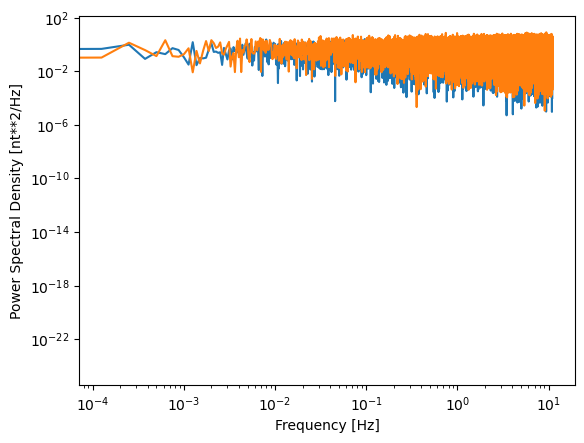

In [17]:
# Here we are calculating the PSD function of each data set:
# Choose 22 Hz as the sampling frequency, as in Gomes et al.
fs = 22 # Hz
fList_shuf1, PSDlist_shuf1 = MFDFAlib.PSDfunc(shuffled_sub,fs)
fList_shuf2, PSDlist_shuf2 = MFDFAlib.PSDfunc(shuffled_super,fs)
#######PLOTTING###################
plt.loglog(fList_shuf1,PSDlist_shuf1, label = f'Shuffled {sub_label}')
plt.loglog(fList_shuf2,PSDlist_shuf2, label = f'Shuffled {super_label}')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power Spectral Density [nt**2/Hz]')
##################################

## Phase-Shuffled Data

In [18]:
# First we use MFDFAlib to shuffle our time series phases:
phaseShuffled_sub = MFDFAlib.phaseShuffle(bmag_sub)
phaseShuffled_super = MFDFAlib.phaseShuffle(bmag_super)

date_label_sub = f'pshuf_sub_4_30_2021_1_{order}'
date_label_super = f'pshuf_super_4_30_2021_1_{order}'
date_label_general = f'pshuf_4_30_2021_1_{order}'

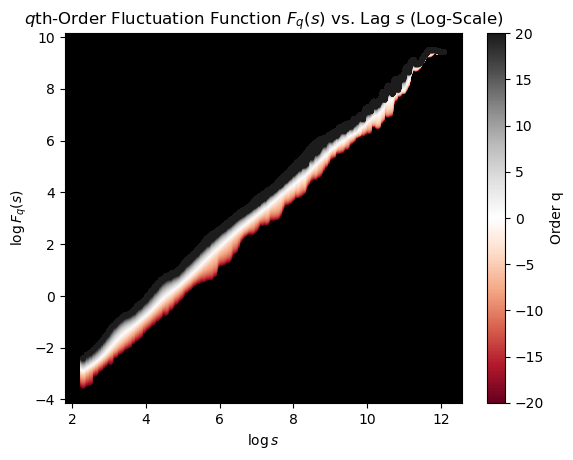

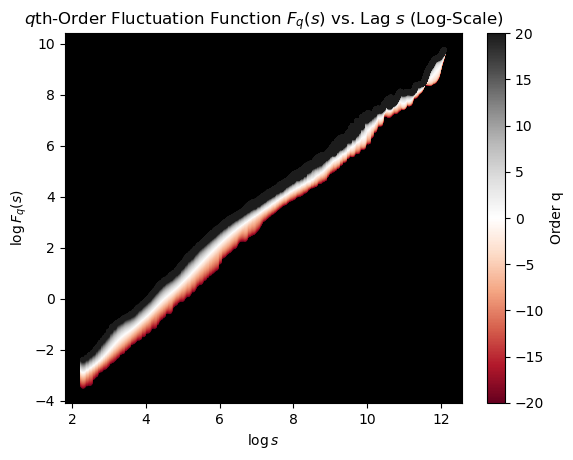

In [19]:
# Find the fluctuation function:
lag1,dfaList_pshuf1 = MFDFAlib.flucFunc(phaseShuffled_sub,lag1,qList,order, date_label_sub)
lag2,dfaList_pshuf2 = MFDFAlib.flucFunc(phaseShuffled_super,lag2,qList,order, date_label_super)

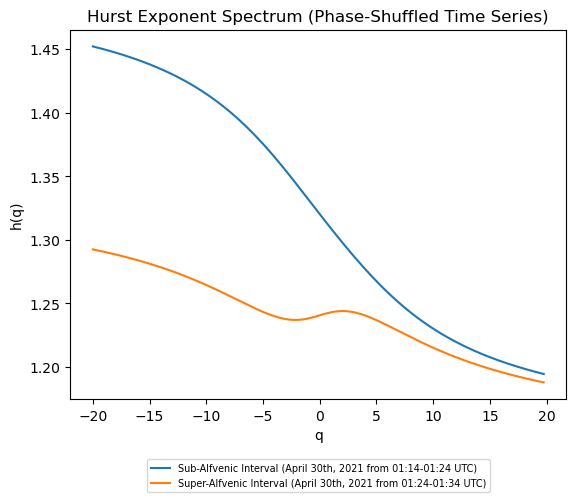

In [20]:
"""
 Hurst parameter spectra from each fluctuation function:
 Note : hList takes in the transpose of the fluctuation matrix,
 which is of the form: [[F_q1(s1),F_q1(s2), ...], [F_q2(s1),F_q2(s2), ...]]
 for the purpose of easily parsing the data  
"""
h_pshuf1=MFDFAlib.hList(lag1,dfaList_pshuf1.T)
h_pshuf2=MFDFAlib.hList(lag2,dfaList_pshuf2.T)
########PLOTTING#################
plt.plot(qList,h_pshuf1,label=sub_label)
plt.plot(qList,h_pshuf2,label=super_label)
plt.ylabel('h(q)')
plt.xlabel('q')
plt.legend(fontsize = 'x-small', loc='upper center', bbox_to_anchor=(0.5, -0.15))
plt.title('Hurst Exponent Spectrum (Phase-Shuffled Time Series)')
plt.savefig(f'./plots/Order_{order}/Hurst_Spectra/hurstSpec_{date_label_general}.png')
plt.show()
#################################

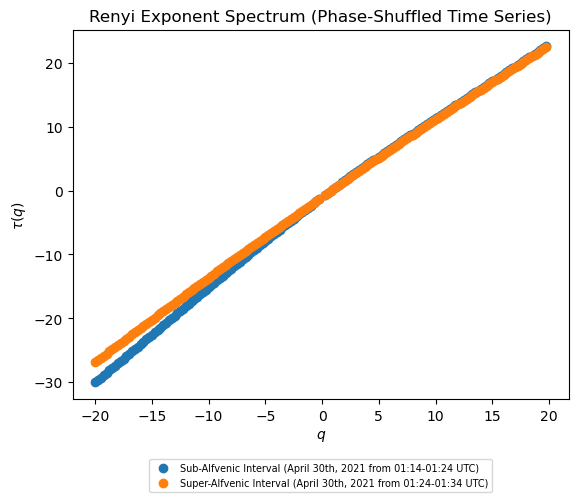

In [21]:
# Now find and plot the Renyi exponent spectrum from the Hurst spectrum:
tauFunc_pshuf1=MFDFAlib.renyiExp(qList,h_pshuf1)
tauFunc_pshuf2=MFDFAlib.renyiExp(qList,h_pshuf2)
########PLOTTING#################
plt.plot(qList,tauFunc_pshuf1,'o',label = sub_label)
plt.plot(qList,tauFunc_pshuf2,'o', label = super_label)
plt.xlabel(r'$q$')
plt.ylabel(r'$\tau(q)$')
plt.legend(fontsize = 'x-small', loc='upper center', bbox_to_anchor=(0.5, -0.15))
plt.title('Renyi Exponent Spectrum (Phase-Shuffled Time Series)')
plt.savefig(f'./plots/Order_{order}/Renyi_Spectra/renyiSpec_{date_label_general}')
plt.show()
#################################

0.17811366945613827 0.26337257529128166 1.1083885910563298 1.1054163055977848


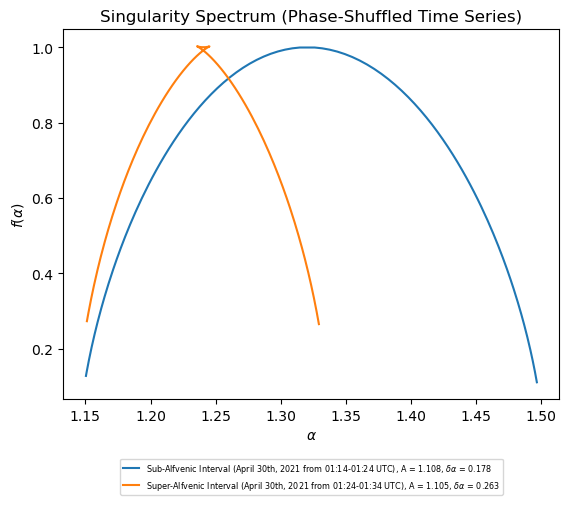

In [22]:
# Finally, from the Renyi exponents, find and plot the multifractal spectra:
alphaList_pshuf1, mfList_pshuf1, deltaAlpha1, A1 = MFDFAlib.mfSpec(tauFunc_pshuf1, qList)
alphaList_pshuf2, mfList_pshuf2, deltaAlpha1, A2 = MFDFAlib.mfSpec(tauFunc_pshuf2, qList)

print(deltaAlpha1, deltaAlpha2, A1, A2)
#######PLOTTING##################
# Finally, plot the f(alpha) function
plt.plot(alphaList_pshuf1, mfList_pshuf1, label = sub_label + rf", A = ${A1:.3f}$, $\delta\alpha$ = {deltaAlpha1:.3f}")
plt.plot(alphaList_pshuf2, mfList_pshuf2, label = super_label + rf", A = ${A2:.3f}$, $\delta\alpha$ = {deltaAlpha2:.3f}")
plt.title('Singularity Spectrum (Phase-Shuffled Time Series)')
plt.legend(fontsize = "xx-small", loc='upper center', bbox_to_anchor=(0.5, -0.15))
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$f(\alpha)$')
plt.savefig(f'./plots/Order_{order}/MF_Spectra/MFSpec_{date_label_general}.png', bbox_inches ='tight')
plt.show()
#################################

## Differenced Series

In [23]:
# First difference the series:
diff_sub = MFDFAlib.difference(bmag_sub)
diff_super = MFDFAlib.difference(bmag_super)


In [24]:
# We first need to select a band of lags, varying from small segments of data to long ones:
# These bands must be integers, since they will segment the data into chunks of side length s:
# 5000 is a good value
lag1 = np.arange(150,len(diff_sub),1)
lag2 = np.arange(150,len(diff_super),1 )
#lag1 = np.unique(np.logspace(0.5, 5, 100, dtype=int))
#lag2 = np.unique(np.logspace(0.5, 5, 100, dtype=int))
# We need to select a range of powers for the fluctuation function.
# Gomes et al. do -20 to 20 with increments of 0.25
qList=np.arange(-20,20,0.25).tolist()
qList.remove(0)

#The order for the polynomial fitting is chosen by Gomes et al. as 3:
order = 3  

 
date_label_sub = f'diff_sub_4_30_2021_1_{order}'
date_label_super = f'diff_super_4_30_2021_1_{order}'
date_label_general = f'diff_4_30_2021_1_{order}'

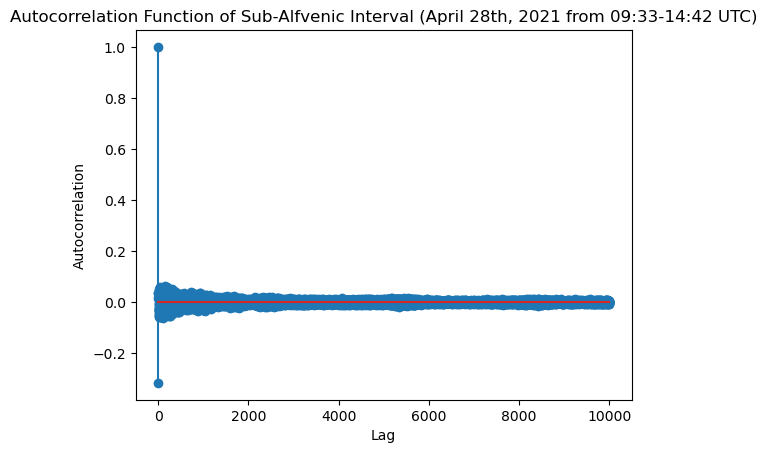

In [25]:
# Calculate the autocorrelation function using statsmodels library
acf = sm.tsa.acf(diff_sub, nlags = 10000)
plt.stem(range(len(acf)), acf)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation Function of Sub-Alfvenic Interval (April 28th, 2021 from 09:33-14:42 UTC)")
plt.show()

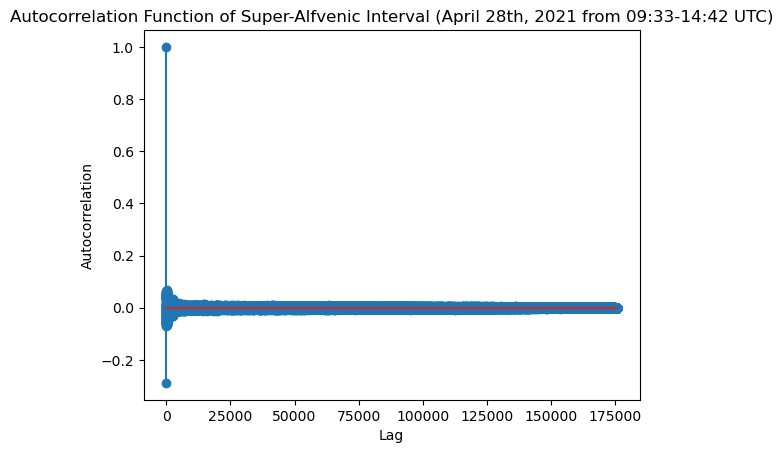

In [26]:
# Calculate the autocorrelation function using statsmodels library
acf = sm.tsa.acf(diff_super, nlags = len(diff_super))
plt.stem(range(len(acf)), acf)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation Function of Super-Alfvenic Interval (April 28th, 2021 from 09:33-14:42 UTC)")
plt.show()

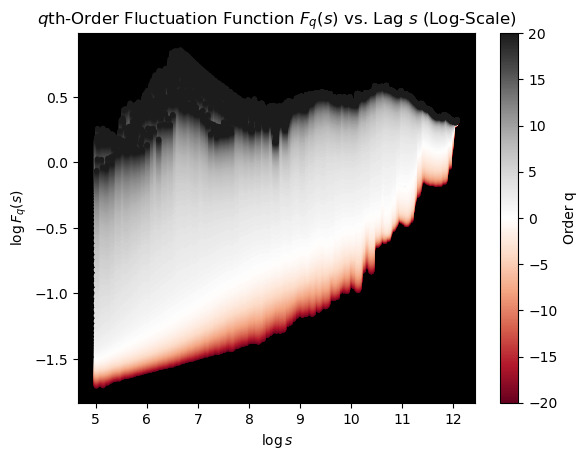

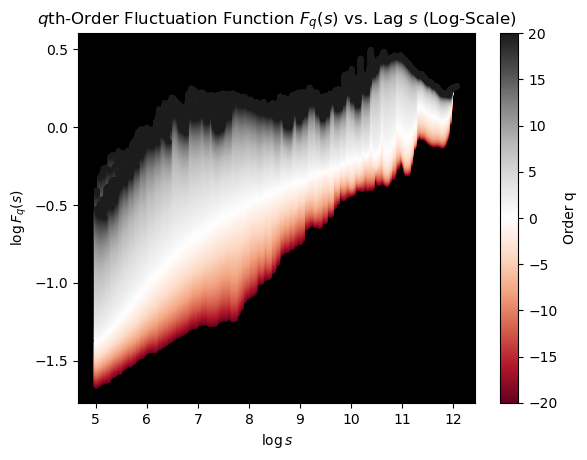

In [27]:
# Find the fluctuation function:
lag1,dfaList_diff1 = MFDFAlib.flucFunc(diff_sub,lag1,qList,order, date_label_sub)
lag2,dfaList_diff2 = MFDFAlib.flucFunc(diff_super,lag2,qList,order, date_label_super)

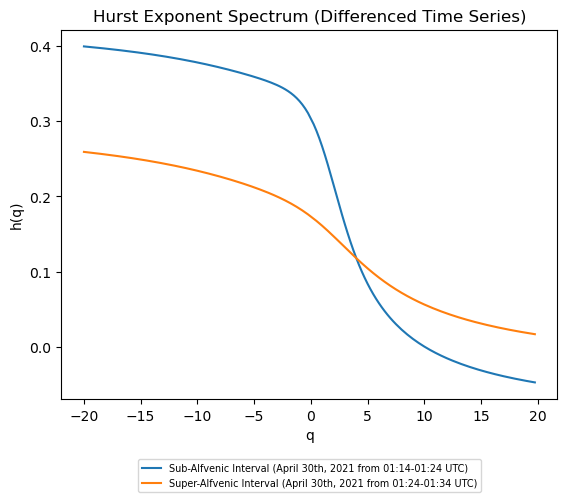

In [28]:
"""
 Hurst parameter spectra from each fluctuation function:
 Note : hList takes in the transpose of the fluctuation matrix,
 which is of the form: [[F_q1(s1),F_q1(s2), ...], [F_q2(s1),F_q2(s2), ...]]
 for the purpose of easily parsing the data  
"""
h_diff1=MFDFAlib.hList(lag1,dfaList_diff1.T)
h_diff2=MFDFAlib.hList(lag2,dfaList_diff2.T)
########PLOTTING#################
plt.plot(qList,h_diff1,label=sub_label)
plt.plot(qList,h_diff2,label=super_label)
plt.ylabel('h(q)')
plt.xlabel('q')
plt.legend(fontsize = 'x-small', loc='upper center', bbox_to_anchor=(0.5, -0.15))
plt.title('Hurst Exponent Spectrum (Differenced Time Series)')
plt.savefig(f'./plots/Order_{order}/Hurst_Spectra/hurstSpec_{date_label_general}.png')
plt.show()
#################################

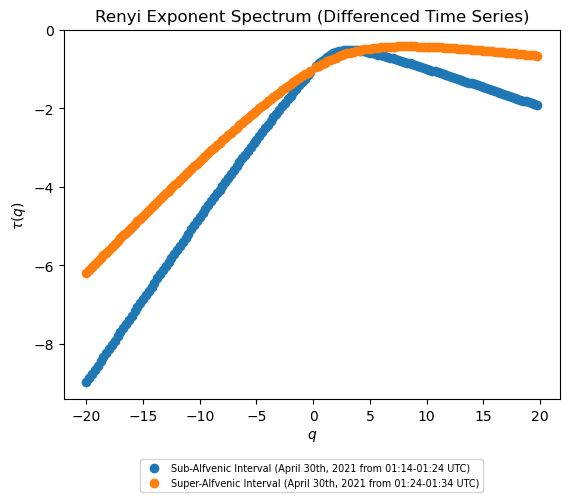

In [29]:
# Now find and plot the Renyi exponent spectrum from the Hurst spectrum:
tauFunc_diff1=MFDFAlib.renyiExp(qList,h_diff1)
tauFunc_diff2=MFDFAlib.renyiExp(qList,h_diff2)
########PLOTTING#################
plt.plot(qList,tauFunc_diff1,'o',label = sub_label)
plt.plot(qList,tauFunc_diff2,'o', label = super_label)
plt.xlabel(r'$q$')
plt.ylabel(r'$\tau(q)$')
plt.legend(fontsize = 'x-small', loc='upper center', bbox_to_anchor=(0.5, -0.15))
plt.title('Renyi Exponent Spectrum (Differenced Time Series)')
plt.savefig(f'./plots/Order_{order}/Renyi_Spectra/renyiSpec_{date_label_general}')
plt.show()
#################################

0.5246074124521432 0.3217199880744728 0.2680931359461285 0.5457562410764769


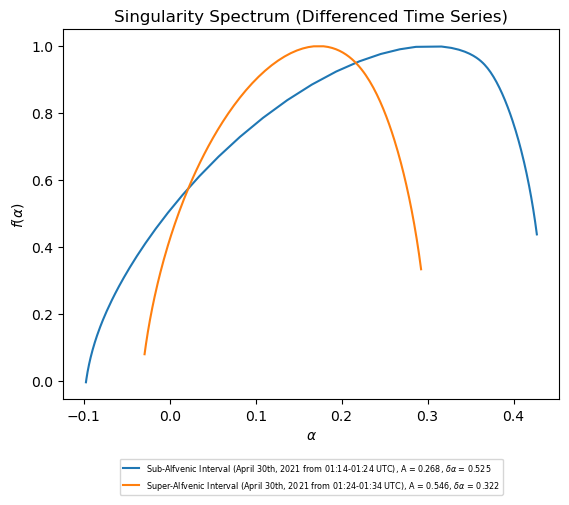

In [30]:
# Finally, from the Renyi exponents, find and plot the multifractal spectra:
alphaList_diff1, mfList_diff1, deltaAlpha1, A1 = MFDFAlib.mfSpec(tauFunc_diff1, qList)
alphaList_diff2, mfList_diff2, deltaAlpha2, A2 = MFDFAlib.mfSpec(tauFunc_diff2, qList)

print(deltaAlpha1, deltaAlpha2, A1, A2)
#######PLOTTING##################
# Finally, plot the f(alpha) function
plt.plot(alphaList_diff1, mfList_diff1, label = sub_label + rf", A = ${A1:.3f}$, $\delta\alpha$ = {deltaAlpha1:.3f}")
plt.plot(alphaList_diff2, mfList_diff2, label = super_label + rf", A = ${A2:.3f}$, $\delta\alpha$ = {deltaAlpha2:.3f}")
plt.title('Singularity Spectrum (Differenced Time Series)')
plt.legend(fontsize = "xx-small",loc='upper center', bbox_to_anchor=(0.5, -0.15))
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$f(\alpha)$')
plt.savefig(f'./plots/Order_{order}/MF_Spectra/MFSpec_{date_label_general}.png', bbox_inches ='tight')
plt.show()
#################################

### Full Domain Plot: 

19-Jun-25 10:18:01: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn/2021/
19-Jun-25 10:18:02: File is current: psp_data/fields/l2/mag_rtn/2021/psp_fld_l2_mag_rtn_2021042800_v02.cdf
19-Jun-25 10:18:02: File is current: psp_data/fields/l2/mag_rtn/2021/psp_fld_l2_mag_rtn_2021042806_v02.cdf
19-Jun-25 10:18:02: File is current: psp_data/fields/l2/mag_rtn/2021/psp_fld_l2_mag_rtn_2021042812_v02.cdf
19-Jun-25 10:18:03: File is current: psp_data/fields/l2/mag_rtn/2021/psp_fld_l2_mag_rtn_2021042818_v02.cdf
19-Jun-25 10:18:03: File is current: psp_data/fields/l2/mag_rtn/2021/psp_fld_l2_mag_rtn_2021042900_v02.cdf
19-Jun-25 10:18:03: File is current: psp_data/fields/l2/mag_rtn/2021/psp_fld_l2_mag_rtn_2021042906_v02.cdf
19-Jun-25 10:18:04: File is current: psp_data/fields/l2/mag_rtn/2021/psp_fld_l2_mag_rtn_2021042912_v02.cdf
19-Jun-25 10:18:04: File is current: psp_data/fields/l2/mag_rtn/2021/psp_fld_l2_mag_rtn_2021042918_v02.cdf
19-Jun-25 10:18:27: Downloading re

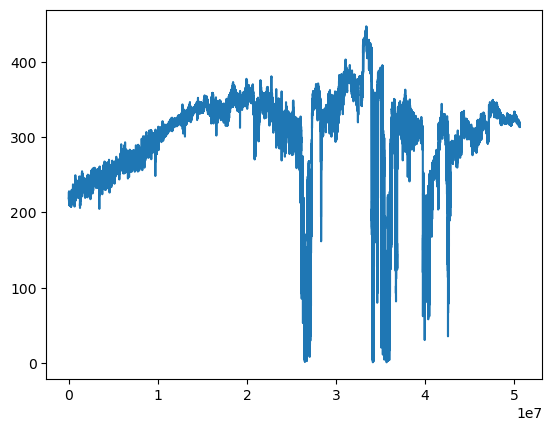

In [31]:
# Now let's choose the total time range to make sure we are plotting the right thing
totalTimeRange = ['2021-4-28/00:00','2021-4-30']

fields_vars = pyspedas.projects.psp.fields(trange=totalTimeRange, datatype='mag_rtn', level='l2', time_clip=True)
b_rtn_tot = pyspedas.get_data("psp_fld_l2_mag_RTN")
b_mag_tot = MFDFAlib.magnitude(b_rtn_tot.y)

#tplot('psp_fld_l2_mag_RTN')
plt.plot(b_mag_tot)